# Bibina 
# Clickbait Detection

In [32]:
#Importing required libraries
import pandas as pandasLibPackage
import matplotlib.pyplot as matPlotLibPackage
import seaborn as snsLibPackage
from wordcloud import WordCloud


In [33]:
# Upload the dataset
datasetFilePath = 'clickbait_data.csv'
inputKaggleData = pandasLibPackage.read_csv(datasetFilePath)

# Data Pre-processing

In [34]:

print("Blank Data in each columns", inputKaggleData.isnull().sum())
print("Duplicated Data", inputKaggleData.duplicated().sum())


Blank Data in each columns headline     0
clickbait    0
dtype: int64
Duplicated Data 0


In [35]:
print(inputKaggleData.info())
print(inputKaggleData['clickbait'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB
None
clickbait
0    16001
1    15999
Name: count, dtype: int64


# Data Analysis

In [36]:
# Ensure 'word_count' column is present
inputKaggleData['word_count'] = inputKaggleData['headline'].apply(lambda x: len(x.split()))

# Configuring the  the boxplot picture
matPlotLibPackage.figure(figsize=(10, 2))  # Horizontal layout
snsLibPackage.boxplot(x=clickbaitDataset['word_count'], color='#579709')
matPlotLibPackage.title('Boxplot of Word Counts in Headlines')
matPlotLibPackage.xlabel('Number of Words')
matPlotLibPackage.show()

KeyError: 'word_count'

<Figure size 1000x200 with 0 Axes>

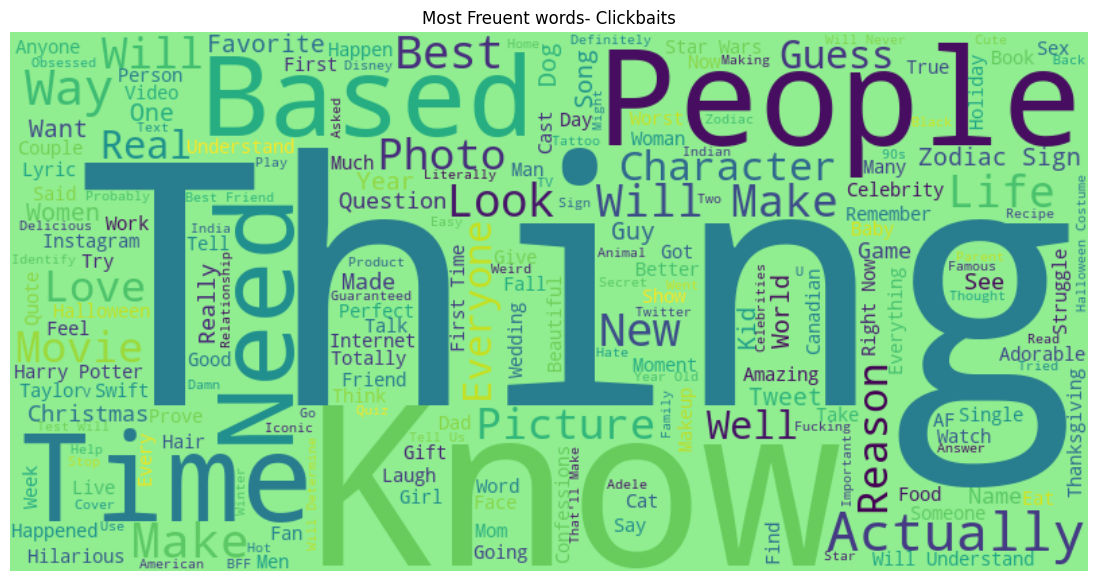

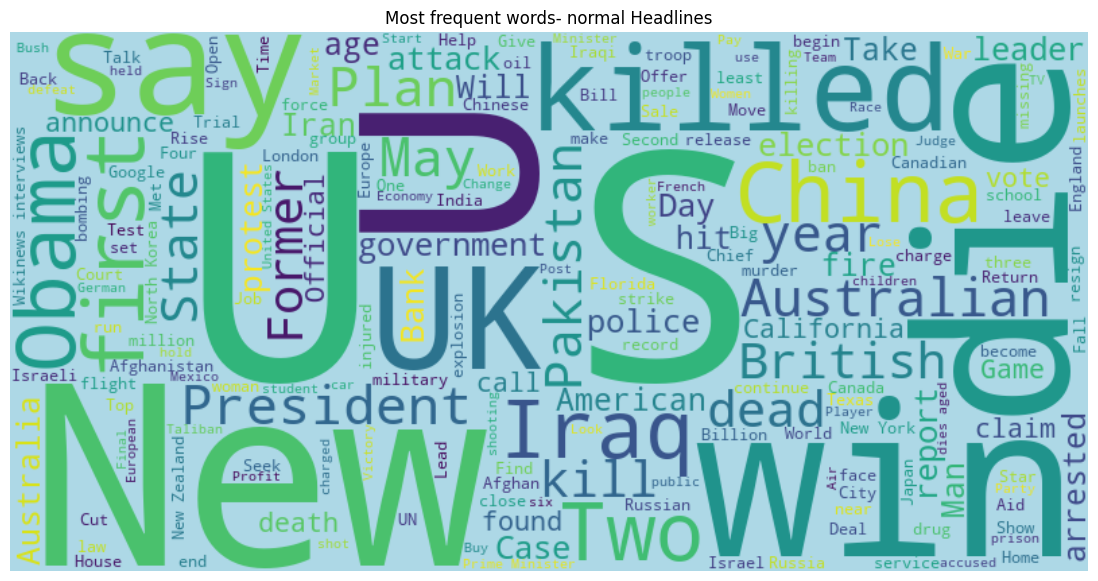

In [42]:
# 2. WordCloud for clickbait headlines
TrueCBs = " ".join(inputKaggleData[inputKaggleData['clickbait'] == 1]['headline'])
NonCBs = " ".join(inputKaggleData[inputKaggleData['clickbait'] == 0]['headline'])

# Generate word clouds
cbCount = WordCloud(
    width=800, 
    height=400, 
    background_color='lightgreen', 
    ).generate(TrueCBs)
nonCbCount = WordCloud(width=800, height=400, background_color='lightblue').generate(NonCBs)

# printing key words
matPlotLibPackage.figure(figsize=(17, 7))
matPlotLibPackage.imshow(cbCount, interpolation='bilinear')
matPlotLibPackage.title("Most Freuent words- Clickbaits", fontsize=12)
matPlotLibPackage.axis('off')
matPlotLibPackage.show()

matPlotLibPackage.figure(figsize=(17, 7))
matPlotLibPackage.imshow(nonCbCount, interpolation='bilinear')
matPlotLibPackage.title("Most frequent words- normal Headlines", fontsize=12)
matPlotLibPackage.axis('off')
matPlotLibPackage.show()

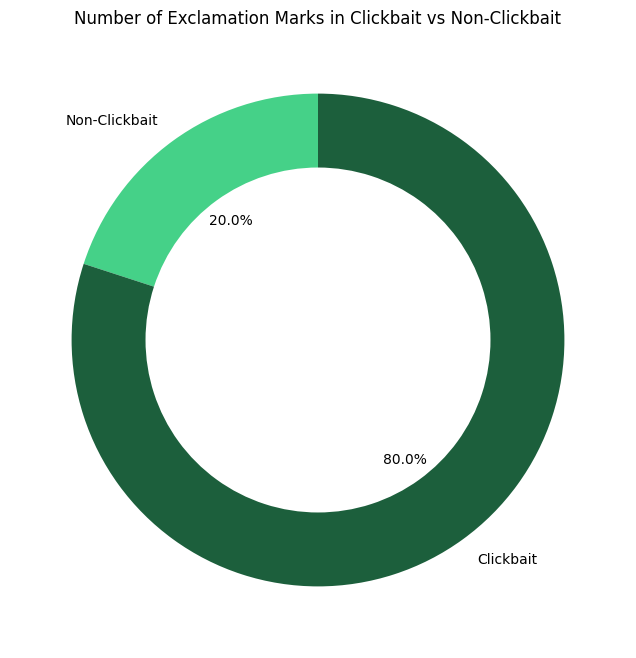

In [44]:
# Calculate the average exclamation mark count for Clickbait and Non-Clickbait
inputKaggleData['exclamation_count'] = inputKaggleData['headline'].apply(lambda x: str(x).count('!'))

esclCnt = inputKaggleData.groupby('clickbait')['exclamation_count'].mean()

# Prepare data for the donut chart
lbl = ['Non-Clickbait', 'Clickbait']

colComb = ['#45D188', '#1C5F3C']

# Create the Donut Chart
matPlotLibPackage.figure(figsize=(8, 8))
matPlotLibPackage.pie(
    esclCnt.values,
    labels=lbl,
    colors=colComb,
    startangle=90,
    wedgeprops=dict(width=0.3),  # Width of the donut
    autopct='%1.1f%%'
)
matPlotLibPackage.title('Number of Exclamation Marks in Clickbait vs Non-Clickbait')
matPlotLibPackage.show()

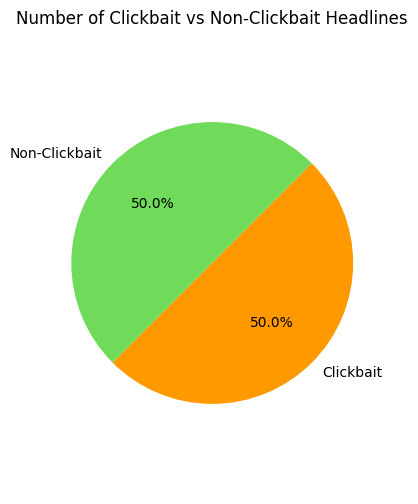

In [30]:
# Pie chart to highlight the partition of non-clickbait and clickbait
cbCnt = inputKaggleData['clickbait'].value_counts()
cbLbls = ['Non-Clickbait', 'Clickbait']

matPlotLibPackage.figure(figsize=(4, 6))
matPlotLibPackage.pie(cbCnt, labels=cbLbls, autopct='%1.1f%%', startangle=45, colors=['#70DB5A', '#FE9900'])
matPlotLibPackage.title('Number of Clickbait vs Non-Clickbait Headlines')
matPlotLibPackage.axis('equal')
matPlotLibPackage.show()